In [418]:
from matplotlib import pyplot as plt
from sympy import *
import sympy as sy
import numpy as np
import math

In [419]:
#########################
#       Problem 1       # 
#########################

x = sy.symbols('x')
y = (sin(x)+1)**(sin(cos(x)))
y

def sympy_diff():
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    df = sy.diff(y, x)
    lam_d = sy.utilities.lambdify(x, df)
    lam_f = sy.utilities.lambdify(x, f)
    
    return lam_f, lam_d

In [420]:
f, df = sympy_diff()
f(2), df(2)

(0.7699453469817825, -0.3463039796609265)

In [421]:
dy=sy.diff(y,x)
dy

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [422]:
dy_lamb=sy.lambdify(x,dy,'numpy')
y_lamb=sy.lambdify(x,y,'numpy')
xvals = np.linspace(-np.pi, np.pi, 100)
dy_lamb(5)

-0.4117441338415354

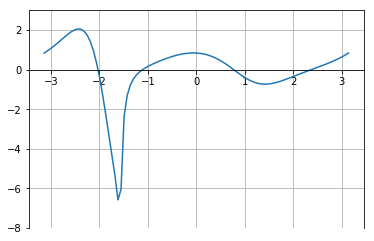

In [423]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals,dy_lamb(xvals))
plt.ylim(-8,3)
plt.grid()
plt.show()

In [424]:
#########################
#       Problem 2       # 
#########################
# Write a function for each of the finite difference quotients

def x_vals(n):
    return np.linspace(-np.pi, np.pi, n)

def fw1(f,x,h):
    return (f(x+h)-f(x))/h
    
def fw2(f,x,h):
    return (-3.*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
    
def bw1(f,x,h):
    return (f(x)-f(x-h))/h
    
def bw2(f, x,h):
    return (3.*f(x)-4.*f(x-h)+f(x-2*h))/(2*h)

def ct2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)
    
def ct4(f, x, h):
    return (f(x-2*h)-8.*f(x-h)+8.*f(x+h)-f(x+2*h))/(12*h)

def centered_o4(f, x, h):
    num = f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)
    return num / (12 * h)

<function matplotlib.pyplot.show(*args, **kw)>

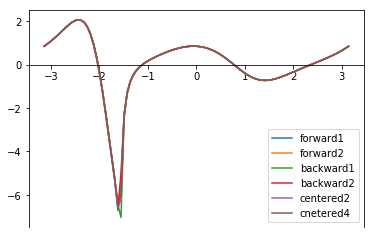

In [425]:
# Plot the results
xvals=x_vals(100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals, fw1(y_lamb,xvals,0.01),label='forward1')
ax.plot(xvals, fw2(y_lamb,xvals,0.01),label='forward2')
ax.plot(xvals, bw1(y_lamb,xvals,0.01),label='backward1')
ax.plot(xvals, bw2(y_lamb,xvals,0.01),label='backward2')
ax.plot(xvals, ct2(y_lamb,xvals,0.01),label='centered2')
ax.plot(xvals, ct4(y_lamb,xvals,0.01),label='cnetered4')
plt.legend(loc='lower right')
plt.show

In [426]:
# compare them to the results of Problem 1
# We can think of calculating difference from true value.

def test(f,n):
    #return sum(abs(dy_lamb(x_vals(n))-f))
    return np.sqrt(sum((dy_lamb(x_vals(n))-f)**2))

In [427]:
# calculate the error for each method when n=100
n=100
print ((test(fw1(y_lamb,x_vals(n),0.01),n),
test(fw2(y_lamb,x_vals(n),0.01),n),
test(bw1(y_lamb,x_vals(n),0.01),n),
test(bw2(y_lamb,x_vals(n),0.01),n),
test(ct2(y_lamb,x_vals(n),0.01),n),
test(ct4(y_lamb,x_vals(n),0.01),n)))

(0.6997656450349302, 0.16461387561452326, 1.0357569516211347, 1.0702085462088602, 0.17970589160089348, 0.08574585542916602)


In [428]:
# calculate the error for each method when n=300
n=300
print (test(fw1(y_lamb,x_vals(n),0.01),n),
test(fw2(y_lamb,x_vals(n),0.01),n),
test(bw1(y_lamb,x_vals(n),0.01),n),
test(bw2(y_lamb,x_vals(n),0.01),n),
test(ct2(y_lamb,x_vals(n),0.01),n),
test(ct4(y_lamb,x_vals(n),0.01),n))

1.7343772059566547 0.9469287658772867 2.735736878923265 3.8208682613690983 0.5837375762903856 0.9104021397577038


In [429]:
#########################
#       Problem 3       # 
#########################

# In problem 1, we defined dy_lamb that compute the derivative.X_0 = 1
dy_lamb(1), y_lamb(1)

(-0.3965403874194623, 1.3689877347067858)

In [430]:
test_func = [fw1,fw2,bw1,bw2,ct2,ct4]
def error_f(x):
    hvals=np.logspace(-8,0,9)
    abs_error = np.zeros((9,6))
    for i in range(9):
        for j in range(6):
            abs_error[i,j]=abs(test_func[j](y_lamb,x,hvals[i])-dy_lamb(x))
    plt.figure()
    labels = ["fw1","fw2","bw1","bw2","ct2","ct4"]
    for j in range(6):
        plt.loglog(hvals,abs_error[:,j], label=labels[j], marker='o')
    plt.legend(loc='upper left')
    plt.show()

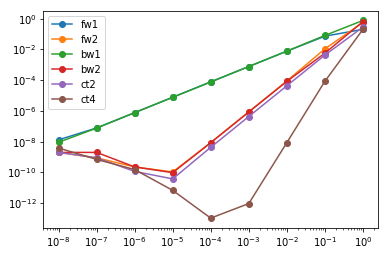

In [431]:
error_f(1)

In [432]:
#########################
#       Problem 4       # 
#########################
data = np.load(r"C:\Users\ericr\Desktop\persp-model-econ_W19\ProblemSets\PS2\plane.npy")
t=data[:0]
alpha=np.deg2rad(data[:,1])
beta=np.deg2rad(data[:,2])

In [433]:
x_pos = 500*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
y_pos = 500*np.tan(alpha)*np.tan(beta)/(np.tan(beta)-np.tan(alpha))

x_veloc = np.zeros(len(x_pos))
y_veloc = np.zeros(len(y_pos))
    
t = 0

while t <= 7:
    if t == 0:
        x_veloc[t] = (x_pos[t+1] - x_pos[t])
        y_veloc[t] = (y_pos[t+1] - y_pos[t])
    elif t < 7:
        x_veloc[t] = (x_pos[t+1] - x_pos[t-1])/2
        y_veloc[t] = (y_pos[t+1] - y_pos[t-1])/2
    else:
        x_veloc[t] = (x_pos[t] - x_pos[t-1])
        y_veloc[t] = (y_pos[t] - y_pos[t-1])
    t += 1

veloc = np.sqrt(x_veloc**2 + y_veloc**2)
print(veloc)

[46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


In [434]:
#########################
#       Problem 5       # 
#########################

# Approximate the Jacobian matrix of f at x using the second order centered difference quotient.

def jacobian(f,x_0):
    h=0.0001
    f_len = len(f(x_0))
    Iden = np.identity(f_len)
    jacob = np.zeros((f_len,len(x_0)))
    for i in range(f_len):
        for j in range(len(x_0)):
            e = Iden[i,:]
            f_h_p = f(x_0+h*e)[j]
            f_h_n = f(x_0-h*e)[j]
            jacob[j,i]=((f_h_p-f_h_n)/(2*h))
    return jacob    
# Test
def func(x):
    return np.array([x[0]**2, x[0]**3 - x[1]])
values = np.array([1.,1.])
jacobian(func,values)

array([[ 2.        ,  0.        ],
       [ 3.00000001, -1.        ]])

In [435]:
x,y=sy.symbols('x,y', real=True)
J = Function('J')(x,y)
f1=x**2
f2=x**3-y
f1x=diff(f1,x)
f1y=diff(f1,y)
f2x=diff(f2,x)
f2y=diff(f2,y)
J = sy.Matrix([[f1x,f1y],[f2x,f2y]])
J.subs([(x,1), (y,1)])
# We can use jacobian function directly
F = sy.Matrix([f1,f2])
F.jacobian([x,y])
F.jacobian([x,y]).subs([(x,1), (y,1)])

Matrix([
[2,  0],
[3, -1]])

We can see that element(2,1) is not exactly same.

In [436]:
#########################
#       Problem 7       # 
#########################

from autograd import grad
import time

def problem7(n):
    func = y_lamb
    time_sympy = np.zeros(n)
    time_autograd = np.zeros(n)
    time_centered = np.zeros(n)
    err_centered = np.zeros(n)
    err_autograd = np.zeros(n)
    
    for i in range(n):
        x_0=np.random.rand()
        
        start_time_sympy=time.time()
        f, df = sympy_diff()
        time_sympy[i]=time.time()-start_time_sympy
        
        start_time_ct4=time.time()
        err_centered[i] = np.abs(ct4(func, x_0, 1e-4) - dy_lamb(x_0))
        time_centered[i] =  time.time() - start_time_ct4

        #start_time_auto=time.time()
        #dfgrad = grad(func)(x_0)
        #err_autograd[i]=np.abs(dfgrad)-dy_lamb(x_0))
        #time_autograd[i]=time.time()-start_time_auto
        
    plt.scatter(time_sympy, 1e-18 * np.ones(n), alpha=0.5, label='SymPy', s=30)
    plt.scatter(time_centered, err_centered, alpha=0.5, label='Centered Difference', s=30)
    #plt.scatter(time_autograd, err_autograd, alpha=0.5, label='Autograd', s=30)
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-12)
    plt.xlabel('Seconds')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

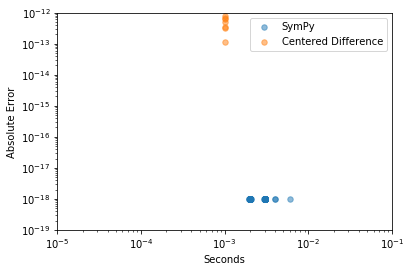

In [437]:
problem7(300)

## Integration Part
#### Question 14.1

In [438]:
g = lambda x: .1 * x ** 4 - 1.5 * x ** 3 + .53 * x ** 2 + 2 * x + 1
a = -10
b = 10
N = 10000

# Calculate the true known value of the integral
import sympy as sy
z = sy.symbols('z')
sy.integrate(0.1*z**4 - 1.5*z**3 + 0.53*z**2 + 2*z + 1, (z, a, b))

4373.33333333333

In [439]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import stats as sts

In [440]:
def num_integral(func, a, b, N, method='midpoint'):
    
    bin_cuts = np.linspace(a, b, num=N)
    i = np.arange(len(bin_cuts))
    
    if method == 'midpoint':
        xi_vals = a + (((2*i+1)*(b - a))/(2*N))
        g_vals = func(xi_vals)
        w = (b - a)/N
        result_mid = w * np.sum(g_vals[:-1])
        return result_mid
        
    elif method == 'trapezoid':
        xi_vals = a + (i*(b - a))/N
        g_vals = np.sum(func(xi_vals)) + func(xi_vals[-1])
        w = (b - a)/(2*N)
        
        result_trap = w * (func(xi_vals[0]) + 2 * g_vals)
        return result_trap
    
    elif method == 'simpsons':
            h = (b - a) / N
            s = func(a) + func(b)
            for i in range(1, N, 2):
                s += 4 * func(a + i * h)
            for i in range(2, N-1, 2):
                s += 2 * func(a + i * h)
            result_simp =s * h / 3
            return result_simp
        

In [441]:
midpoint = num_integral(g, -10, 10, 10000, 'midpoint')
print('Integral computed via midpoint method:  ', midpoint)
trap = num_integral(g, -10, 10, 10000, 'trapezoid')
print('Integral computed via trapezoid method: ', trap)
simp = num_integral(g, -10, 10, 10000, 'simpsons')
print('Integral computed via Simpson method:   ', simp)

Integral computed via midpoint method:   4374.1851216356135
Integral computed via trapezoid method:  4377.9757567908655
Integral computed via Simpson method:    4373.333333333318


#### Question 14.2
Write a python function that makes a Newton-Cotes discrete approximation of the distribuiton of the normally distributed variable Z~N(mu, sigma)

In [442]:
from scipy.stats import norm
import matplotlib.pyplot as plt

Weights:
[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.         0.00346697]
Nodes:
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


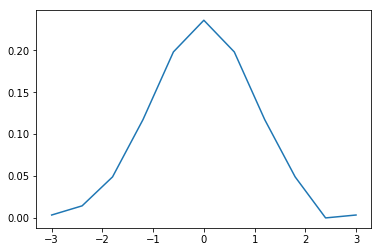

In [443]:
def approx_normal(mu, sigma, N, k):
    
    Z = np.linspace(mu - k*sigma, mu + k*sigma, N)
    w = np.zeros_like(Z)
    w[0] = norm.cdf((Z[0] + Z[1]) / 2, loc=mu, scale=sigma)
    w[N - 1] = 1 - norm.cdf((Z[N - 2] + Z[N - 1]) / 2, loc=mu, scale=sigma)
    for i in range(1, N - 2):
        z_min = (Z[i - 1] + Z[i]) / 2
        z_max = (Z[i] + Z[i + 1]) / 2
        w[i] = norm.cdf(z_max, loc=mu, scale=sigma) - norm.cdf(z_min, loc=mu, scale=sigma)
    return Z, w

Z, w = approx_normal(0,1,11,3)
print('Weights:')
print(w)
print('Nodes:')
print(Z)


plt.plot(bin_cuts, w)
plt.show()

#### Question 14.3

Weights:
[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.         0.00346697]
Nodes:
[ 0.04978707  0.09071795  0.16529889  0.30119421  0.54881164  1.
  1.8221188   3.32011692  6.04964746 11.02317638 20.08553692]


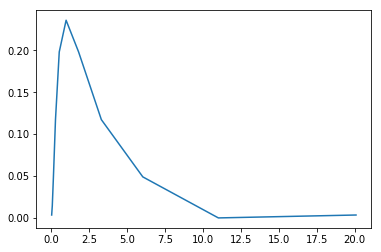

In [444]:
def approx_lognormal(mu, sigma, N, k):
    Z, w_log = approx_normal(mu, sigma, N, k)
    Z_log = np.exp(Z)
    return Z_log, w_log
    
Z_log, w_log = approx_lognormal(0,1,11,3)
print('Weights:')
print(w_log)
print('Nodes:')
print(Z_log)

plt.plot(Z_log,w_log)
plt.show()

Weights are same in 14.2 and 14.3

#### Question 14.4

In [445]:
mu = 10.5
sigma = 0.8
N = 100
k = 3
Y, w = approx_lognormal(mu,sigma,N,k)

In [446]:
exact = np.exp(mu+(sigma**2)/2)
print ('Exact expected value :       ', exact)
EY = Y@w
print ('Approximated expected value :       ', EY)

Exact expected value :        50011.087008521754
Approximated expected value :        49739.23910845465


In [447]:
EY = sum(w[i]*Y[i] for i in range(len(Y)))
EY

49739.23910845463

#### Question 14.5
Approximate the integral of the function in Exercise 2.1

In [448]:
# write down all equations as in 14.11 as N=3

import scipy as sc
import scipy.optimize as opt

g = lambda x: .1 * x ** 4 - 1.5 * x ** 3 + .53 * x ** 2 + 2 * x + 1

def equations(parameters):
    w1, w2, w3, x1, x2, x3 = parameters
    
    eq0 = (b - a) - (w1 + w2 + w3)
    
    eq1 = ((1/2) * b ** 2 - (1/2) * a ** 2) - (w1 * x1 + w2 * x2 + w3 * x3)
    
    eq2 = ((1/3) * b ** 3 - (1/3) * a ** 3) - (w1 * x1**2 + w2 * x2**2 + w3 * x3**2)
    
    eq3 = ((1/4) * b ** 4 - (1/4) * a ** 4) - (w1 * x1**3 + w2 * x2**3 + w3 * x3**3)
    
    eq4 = ((1/5) * b ** 5 - (1/5) * a ** 5) - (w1 * x1**4 + w2 * x2**4 + w3 * x3**4)
    
    eq5 = ((1/6) * b ** 6 - (1/6) * a ** 6) - (w1 * x1**5 + w2 * x2**5 + w3 * x3**5)
    
    return (eq0, eq1, eq2, eq3, eq4, eq5)

a = -10
b = 10

parameters = opt.root(equations,np.ones((6,1)), tol = 1e-8).x
omega, Z = parameters[:3], parameters[-3:]

integ_val = sum(omega[i]*g(Z[i]) for i in range(len(Z)))


# Calculate the true known value of the integral
import sympy as sy
z = sy.symbols('z')
exact=sy.integrate(0.1*z**4 - 1.5*z**3 + 0.53*z**2 + 2*z + 1, (z, a, b))


print ('Gaussian Quadrature:       ', integ_val)
print ('True known value:       ', exact)

Gaussian Quadrature:        4373.333333340382
True known value:        4373.33333333333


#### Question 14.6
Use the python Gaussian quadrature command to numerically approximate integral

In [449]:
sc.integrate.quad(g, -10, 10)[0]

4373.333333333334

#### Question 14.7
Use Monte Carlo integration to aaproximate $\pi$

In [ ]:
import math

np.random.seed(seed=25)

def monte(g, domain, N):
    draws = np.zeros((N,2))
    monte_sum = 0
    for i in range(N):
        for j in range(2):
            draws[i,j] = np.random.uniform(domain[j,0],domain[j,1])
        monte_sum+=g(draws[i,:])
    return (4/N)*monte_sum

g = lambda x: 1 if x[0]**2+x[1]**2 <= 1 else 0
domain = np.array([[-1,1],[-1,1]]) 

#### Question 14.8
Define a function in that returns the  𝑛 -th element of a  𝑑 -dimensional equidistributed sequence. It should have support for the four sequences in the Table in Section 4.2.

In [459]:
import math

def equid(n, d, sequence):
    def frac(x):
        return float(x % 1)
    
    dprimes = [ 2 ]
    m = 3
    while len(dprimes) < d:
        for p in dprimes:
            if m % p == 0:
                break
        else:
            dprimes.append(m)
        m += 2 
        
    x_n = np.zeros(d) 
     
    # Weyl: frac(np_d^0.5)
    if sequence == 'Weyl':
        for i in range(d):
            x_n[i] = frac(n * math.sqrt(dprimes[i]))
        return x_n
    # Haber: frac(1/2 * n(n + 1) p_d^0.5)
    elif sequence == 'Haber':
        for i in range(d):
            x_n[i] = frac((n * (n+1)/2) * math.sqrt(dprimes[i]))
        return x_n
    # Haber: frac(n * 2^(d/(n + 1)))
    elif sequence == 'Niederreiter':
        for i in range(d):
            x_n[i] = frac(n * 2**((i+1)/(n+1)))
        return x_n
    # Haber: frac(n * e^(r_d))
    elif sequence == 'Baker':
        for i in range(d):
            x_n[i] = frac(n * math.exp(1/(i+1)))
        return x_n 
    else:
        raise ValueError("Entered sequence type not valid")

        
# The first Weyl and Harber should be the same
print(equid(10,4,'Weyl'))
print(equid(10,4,'Haber'))
print(equid(10,4,'Niederreiter'))
print(equid(10,4,'Baker'))

[0.14213562 0.32050808 0.36067977 0.45751311]
[0.78174593 0.26279442 0.98373876 0.51632211]
[0.65041089 0.34312522 0.08089444 0.86664898]
[0.18281828 0.48721271 0.95612425 0.84025417]


#### Question 14.9\
approximate the value of  𝜋 , this time using quasi-Monte Carlo integration.

In [463]:
def get_primes(n):
    def is_prime(n):
        if n % 2 == 0 and n > 2: 
            return False
        return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    
    num_prime = 0
    number = 1
    primes = []
    while num_prime < n:
        
        if is_prime(number):
            primes.append(number)
        
        number +=1
        num_prime = len(primes)
    
    return np.asarray(primes)

In [464]:
domain = np.array([[-1, 1], [-1, 1]])
N = 100

def mc_int_eqi(g, domain_x, N):
    
    V = np.prod(np.diff(domain, axis=1))
    num_vars = len(domain_x)
    g_vec = np.empty(N)
    new_x = Haber(N, num_vars)
    g_vec = g(new_x)
    
    integral = g_vec.sum() * (V/N)
    
    return integral

In [465]:
N = 100000
mc_int_eqi(g, domain, N)

NameError: name 'is_prime' is not defined